In [1]:
import math
import numpy as np
set = np.linspace(-10, 10, 1000)
def gauss(x, sigma, m):
    return (1/(math.sqrt(sigma * 2 * np.pi))) * (np.exp(-(x - m)**3/(2*sigma)))

sigma_1 = []

for x in set:
    sigma_1.append(gauss(x, 0.5, 0))
print(sigma_1)

[inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, 7.450473540347565e+307, 6.3379755882519245e+305, 5.508219122263959e+303, 4.890405906816418e+301, 4.435379139569888e+299, 4.109110559220532e+297, 3.8884384534218174e+295, 3.75830523723104e+293, 3.710029623430972e+291, 3.7403333103818057e+289, 3.8509681196521884e+287, 4.0488838981393266e+285, 4.346959529030995e+283, 4.765405200713556e+281, 5.334050555197254e+279, 6.095882220247558e+277, 7.112417551333033e+275, 8.471849884626135e+273, 1.0301457587688454e+272, 1.2786674722518776e+270, 1.6200714126980288e+268, 2.0951127210964937e+266, 2.765390165687139e+264, 3.725291921540166e+262, 5.121511764820946e+260, 7.185369355673891e+258, 1.0287081252533017e+257, 1.5028183312129914e+255, 2.2401192082183708e+253, 3.4069456039002184e+25

C:\Users\админ\AppData\Local\Temp\ipykernel_9040\3846634612.py:5: RuntimeWarning: overflow encountered in exp
  return (1/(math.sqrt(sigma * 2 * np.pi))) * (np.exp(-(x - m)**3/(2*sigma)))


[0.024317595386002377, 5.4431991382112716e-05]
[0.00027151869469835494, 5.5983985984155794e-05]


C:\Users\админ\AppData\Local\Temp\ipykernel_9040\2232574718.py:14: ComplexWarning: Casting complex values to real discards the imaginary part
  fl = np.asarray(root, float)
C:\Users\админ\AppData\Local\Temp\ipykernel_9040\2232574718.py:21: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(mv, float)


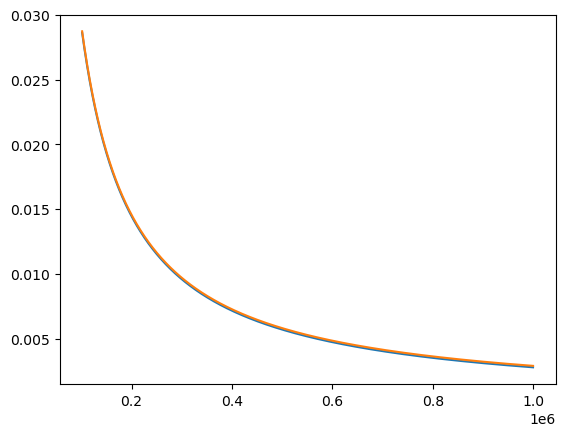

In [3]:
import numpy as np
Polynomial = np.polynomial.Polynomial
import matplotlib.pyplot as plt
global R, a, b
R = 8.314
a = 0.4225
b = 37.07e-6

def crit_param(t, p):
    tc = 8*a/(27*R*b)
    pc = a/(27*b**2)
    mol_volume = Polynomial([-a*b, a, -(p*b+R*t), p])
    root = mol_volume.roots()
    fl = np.asarray(root, float)
    return [fl.max(), fl.min()]

def isoterm(p):
    t = 350
    vdv = Polynomial([-a*b, a, -(p*b+R*t), p])
    mv = vdv.roots()
    return np.asarray(mv, float)
    
print(crit_param(298, 101325))
print(crit_param(500, 12000000))

isoterm_vdv = []
isoterm_eig = []

p_ = np.linspace(101325, 1000000, 1000)

for p in p_:
    isoterm_vdv.append(isoterm(p)[2])
    isoterm_eig.append(R*350/p)
    

plt.plot(p_,isoterm_vdv)
plt.plot(p_,isoterm_eig)
plt.show()


In [9]:
from __future__ import annotations
import numpy as np
from typing import Callable
from scipy.optimize import least_squares

def linear(x: float | np.ndarray,
          params: tuplr[float, float]) -> float | np.ndarray:
    a0, a1 = params
    return a0 + a1 * x

def residuals(params: tuple[float, float], x: np.ndarray,
             y: np.ndarray, func: Callable) -> np.ndarray:
    return y - func(x,params)

conz = np.array([0.4, 0.6, 0.8, 1.0, 1.2])
i = np.array([0.891, 0.841, 0.783, 0.744, 0.692])
x0 = 0.01, 0.01

results = least_squares(residuals, x0=x0, args=(conz, i, linear))
linear_params, linear_cost = results.x, results.cost

alfa = - linear_params[1]/0.8
print(alfa)



0.30937500135899026
